## 你要完成的任务
- 构造更多特征
- 多种分类模型
- 将你写好的各种模型添加到clfs中查看结果

In [1]:
## 导入的库
from sklearn.datasets import load_iris # 导入iris数据集
from sklearn.model_selection import train_test_split # 导入训练集测试集的划分
import pandas as pd

In [2]:
## 加载数据
iris_dataset = load_iris()
# 将iris_dataset对象中的data和feature_names 转换为dataframe类型数据
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
# 添加属性sepal_area
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
# 添加标签
df['label'] = iris_dataset['target']
#查看前10行数据
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,label
0,5.1,3.5,1.4,0.2,17.85,0
1,4.9,3.0,1.4,0.2,14.70,0
2,4.7,3.2,1.3,0.2,15.04,0
3,4.6,3.1,1.5,0.2,14.26,0
4,5.0,3.6,1.4,0.2,18.00,0
5,5.4,3.9,1.7,0.4,21.06,0
6,4.6,3.4,1.4,0.3,15.64,0
7,5.0,3.4,1.5,0.2,17.00,0
8,4.4,2.9,1.4,0.2,12.76,0
9,4.9,3.1,1.5,0.1,15.19,0


## 构造更多特征
参考“面积”特征构造更多特征

In [3]:
## 构造更多特征
# 在构造一个petal_area特征
df.drop('label',axis=1,inplace=True)
df['petal_area']=df['petal length (cm)']*df['petal width (cm)']
df['label']=iris_dataset['target']
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,label
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0
5,5.4,3.9,1.7,0.4,21.06,0.68,0
6,4.6,3.4,1.4,0.3,15.64,0.42,0
7,5.0,3.4,1.5,0.2,17.00,0.30,0
8,4.4,2.9,1.4,0.2,12.76,0.28,0
9,4.9,3.1,1.5,0.1,15.19,0.15,0


## 试试更多模型
查看sklearn更多分类模型，并调节参数

In [4]:
## 试试更多模型
# 查看sklearn中有那些库以及库的描述使用
help('sklearn.tree')

Help on package sklearn.tree in sklearn:

NAME
    sklearn.tree

DESCRIPTION
    The :mod:`sklearn.tree` module includes decision tree-based models for
    classification and regression.

PACKAGE CONTENTS
    _criterion
    _splitter
    _tree
    _utils
    export
    setup
    tests (package)
    tree

CLASSES
    sklearn.base.ClassifierMixin(builtins.object)
        sklearn.tree.tree.DecisionTreeClassifier(sklearn.tree.tree.BaseDecisionTree, sklearn.base.ClassifierMixin)
            sklearn.tree.tree.ExtraTreeClassifier
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.tree.tree.DecisionTreeRegressor(sklearn.tree.tree.BaseDecisionTree, sklearn.base.RegressorMixin)
            sklearn.tree.tree.ExtraTreeRegressor
    sklearn.tree.tree.BaseDecisionTree(abc.NewBase)
        sklearn.tree.tree.DecisionTreeClassifier(sklearn.tree.tree.BaseDecisionTree, sklearn.base.ClassifierMixin)
            sklearn.tree.tree.ExtraTreeClassifier
        sklearn.tree.tree.DecisionTreeRegre

## 将你写好的各种模型添加到clfs中查看结果

In [5]:
## 将你写好的各种模型添加到分类器类表中（clfs）
from sklearn.metrics import accuracy_score
import time
import numpy as np 

## 模型
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC #SVM
from sklearn.tree import DecisionTreeClassifier# 用sklearn中的决策树做分类
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.linear_model import Perceptron #感知器做分类
from sklearn.naive_bayes import MultinomialNB # 贝叶斯分类器
from sklearn.ensemble import GradientBoostingClassifier  #梯度提升决策树
## test in different models
def test_model(df):
    """
    df: DataFrame format data
    """
    # 特征取所有的行,列就是除了最后一行不取   标签就是最后一列
    features, labels = df.iloc[:, :-1].values, df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(features, labels, \
        shuffle=True, test_size=0.3, random_state=42)

    ## classify model
    clfs = [
        KNeighborsClassifier(n_neighbors=2, 
                            weights='uniform',  # uniform、distance
                            algorithm='auto',  # {‘auto’，‘ball_tree’，‘kd_tree’，‘brute’}
                            leaf_size=10, 
                            # p=1, 
                            metric='minkowski', 
                            metric_params=None
#                             n_jobs=None
                            ),
        
        SVC(C=1e7, kernel='rbf',
                    shrinking=True, 
                    probability=False, 
                    tol=1e-2,
                    cache_size=200, 
                    class_weight=None, 
                    verbose=False, 
                    # max_iter=1e5, 
                    # decision_function_shape='ovr', 
                    random_state=42),
        DecisionTreeClassifier(random_state=10),
        RandomForestClassifier(),
        LogisticRegression(),
        Perceptron(),
        MultinomialNB(),
        GradientBoostingClassifier()
        
        
    ]
    
    ## train and print(accuracy)
    print("="*40, "result", "="*40)
    print("%40s %10s %10s"%("Model        ", "Accuracy(train|test)", "time"))
    result = []
    weights = [] # model vote weight
    score_list = []
    train_score_list = []
    for clf in clfs:
        start = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_pred, y_test)
        train_score = clf.score(X_train, y_train)
        score_list.append(score)
        train_score_list.append(train_score)
        weights.append(score)
        print("%40s %5.4f|%5.4f %10.2f s"%(type(clf).__name__, train_score, score, time.time() - start))
        result.append([type(clf).__name__, score])
    print("%40s %5.4f|%5.4f %10.2f s"%("Average", np.mean(train_score_list), np.mean(score_list), 0.0))
    result.append(["Average", np.mean(score)])

    ## model merge
    N = len(weights)
    split_index = sum(weights) / 2
    pred = np.zeros(len(y_pred))
    start = time.time()
    for i, clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        pred += weights[i] * y_pred
    
    pred[pred<=split_index] = 0
    pred[pred>split_index] = 1
    score = accuracy_score(pred, y_test)
    print("%40s %10.4f %10.2f s"%("Model Stack", score, time.time() - start))
    result.append(["Model Stack", score])
    
    print("="*40, "end", "="*40)
    return result

## 结果保存成 csv 文件
def save_csv(result, path="./result.csv"):
    res_df = pd.DataFrame(result)
    res_df.columns = ['method', 'score']
    res_df.to_csv(path, index=None)

result = test_model(df)
save_csv(result)

======================================== result ========================================
                           Model         Accuracy(train|test)       time
                    KNeighborsClassifier 0.9714|0.9778       0.00 s
                                     SVC 1.0000|1.0000       0.00 s
                  DecisionTreeClassifier 1.0000|1.0000       0.00 s
                  RandomForestClassifier 0.9905|1.0000       0.01 s
                      LogisticRegression 0.9524|1.0000       0.01 s
                              Perceptron 0.6476|0.7111       0.00 s
                           MultinomialNB 0.9619|0.9778       0.00 s
              GradientBoostingClassifier 1.0000|0.9778       0.11 s
                                 Average 0.9405|0.9556       0.00 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


                             Model Stack     0.7111       0.13 s
======================================== end ========================================


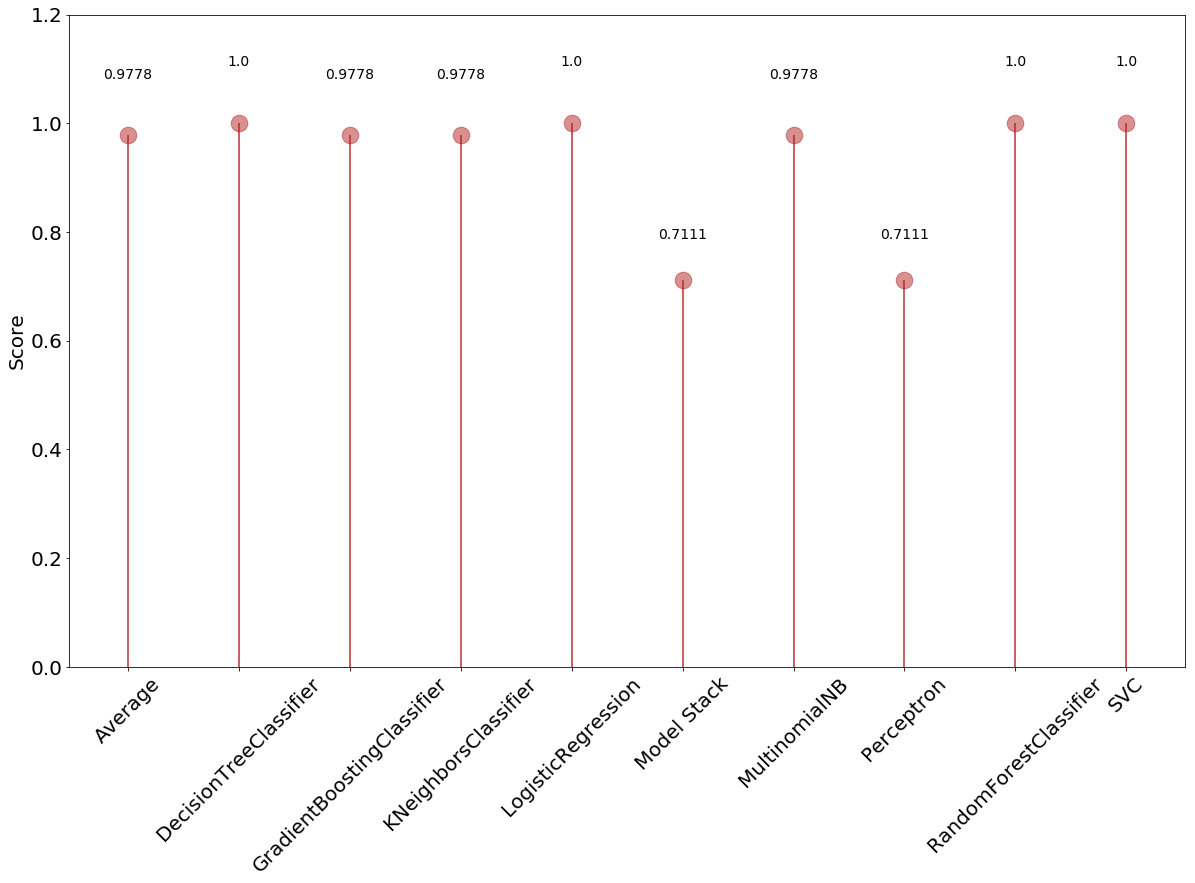

In [6]:
## 可视化
import matplotlib.pyplot as plt

## load data
data_path = "./result.csv"
res_df = pd.read_csv(data_path)

## show
plt.figure(figsize=(20, 12))
plt.vlines(x=res_df['method'], ymin=0, ymax=res_df['score'], color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(res_df['method'], res_df['score'], s=275, color='firebrick', alpha=0.5)

for k in res_df.values:
    plt.text(k[0], k[1]*1.1, round(k[1], 4), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.ylim([0, max(res_df['score'])*1.2])
plt.xticks(fontsize=20, rotation=45);
plt.yticks(fontsize=20);
plt.ylabel('Score', fontsize=20);
plt.show()